In [133]:
##import all our useful packages

import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

from minepy import MINE
from scipy.spatial import distance
import math

import csv
from pandas import read_csv

In [159]:
df = pd.read_csv('magneticmoment_Ef_data.csv', header=0)
mine = MINE(alpha=0.6, c=15) #a=.6 recommended by paper, c of more than 15 has no change in result
print("num columns = ", len(df.columns))

num columns =  83


In [158]:
y_axis = "magnetic_moment"



MIC_corrs = []

for j in range(len(df.columns)):
   if(isinstance(df.iloc[0][j], np.float64) or isinstance(df.iloc[0][j], np.int64)):
        
        #print(df.iloc[:,j])
        mine.compute_score(df.iloc[:,j],df[y_axis]) 
        tmp_corr = mine.mic() 

        colname = df.columns[j]
        
        MIC_corrs.append((colname, tmp_corr))

corrdf = pd.DataFrame.from_records(MIC_corrs[1:], columns=['feature', 'correlation'])


corrdf = corrdf.dropna()

corrdf = corrdf.sort_values(by=['correlation'])

display(corrdf)


<ipython-input-158-1cc50d65f2d5>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(df.iloc[:,j],df[y_axis])


,feature,correlation
54,cmpd_skew_f,0.000000
6,num_f,0.000000
58,frac_f,0.000000
57,cmpd_sigma_f,0.000000
34,numelectron_std,0.202412
...,...,...
65,Nup_mean,0.598304
49,nvalence_std,0.628053
50,nvalence_avg,0.631397
53,cmpd_skew_d,0.764636


In [123]:
display(corrdf.iloc[-13:-1])

,feature,correlation
0,formation_energy,0.406445
21,covalentrad_max_dif,0.412775
48,nvalence_std_dif,0.484723
47,nvalence_sum_dif,0.494933
25,dipole_avg,0.539651
51,nvalence_max_dif,0.551342
5,num_d,0.554245
56,cmpd_sigma_d,0.559062
65,Nup_mean,0.598304
49,nvalence_std,0.628053


In [125]:
features = ["Nup_mean", "cs_bob",  "nvalence_max_dif", "dipole_avg", "Nup_var", "nvalence_std", 
            "nvalence_avg", "dipole_std_dif",  "vdwradius_avg", "covalentrad_std_dif", "dipole_max_dif", "hardness_mean" ]
tmpdf = corrdf.loc[corrdf['feature'] == features[0]]
for i in range(1,len(features)):
    tmpdf = pd.concat( (tmpdf, corrdf.loc[corrdf['feature'] == features[i]]) )

display(tmpdf.sort_values(by=['correlation']))

,feature,correlation
40,vdwradius_avg,0.266540
63,hardness_mean,0.267534
18,covalentrad_std_dif,0.274642
23,dipole_std_dif,0.292529
67,cs_bob,0.317229
66,Nup_var,0.335932
26,dipole_max_dif,0.367349
25,dipole_avg,0.539651
51,nvalence_max_dif,0.551342
65,Nup_mean,0.598304


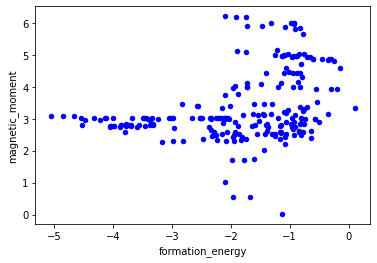

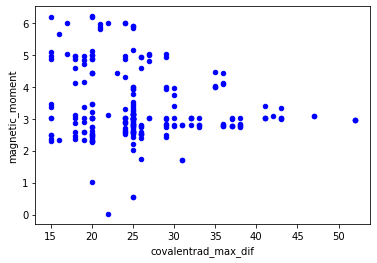

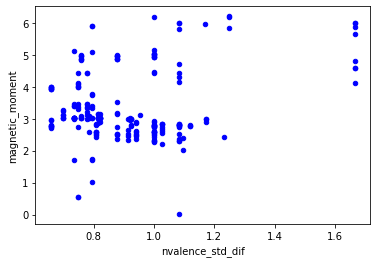

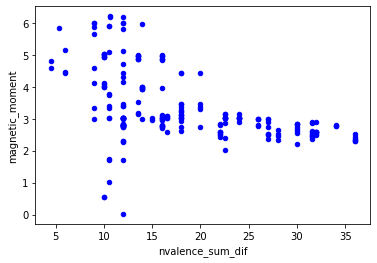

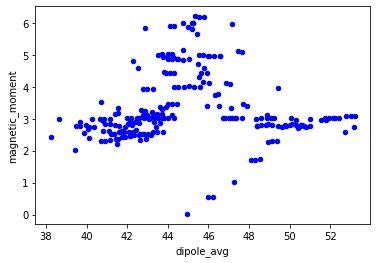

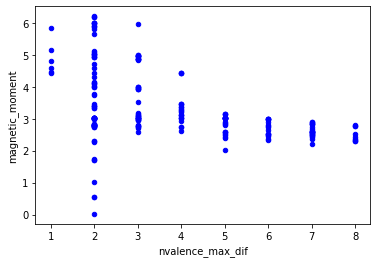

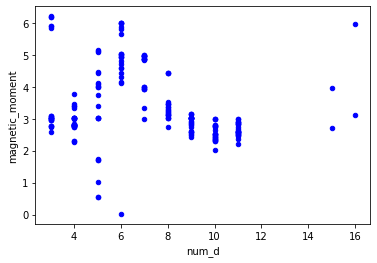

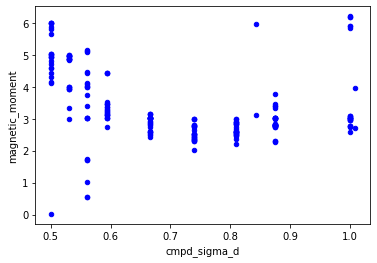

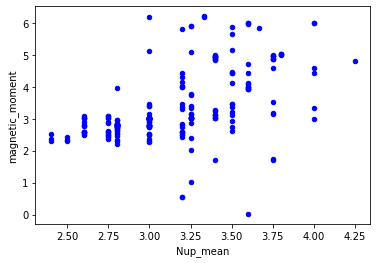

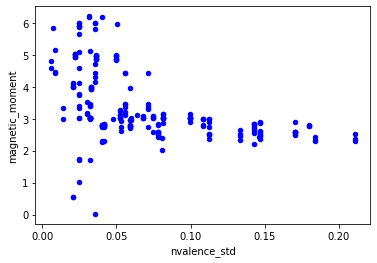

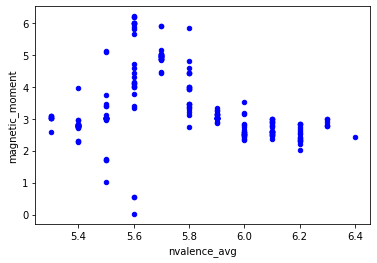

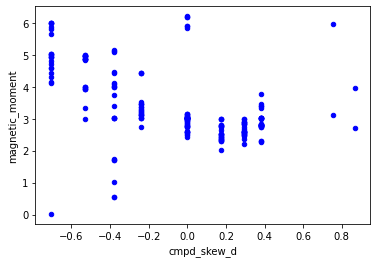

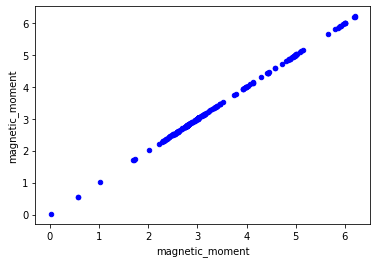

In [172]:
n = 12

for i in range(len(corrdf)-n-1, len(corrdf)):
    name = corrdf.iloc[i].feature
   
    ax1 = df.plot.scatter(x=name, y=feature2, c='Blue')

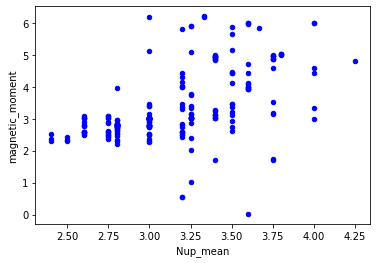

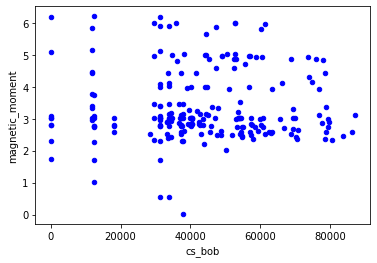

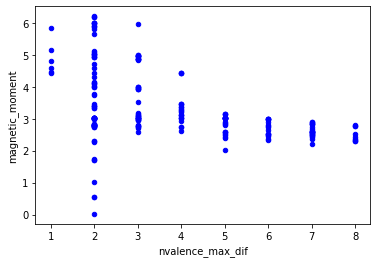

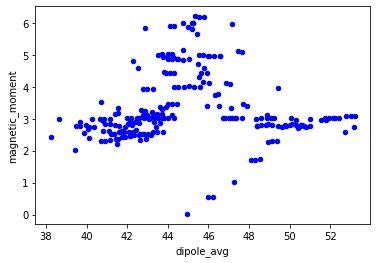

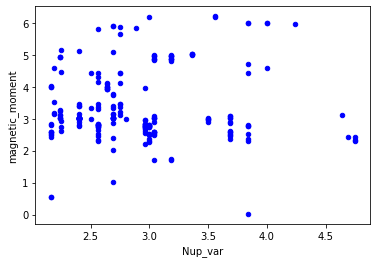

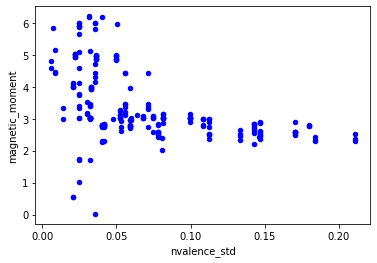

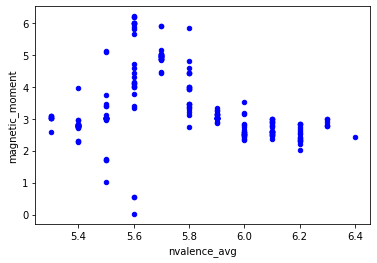

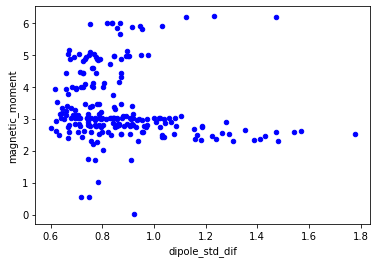

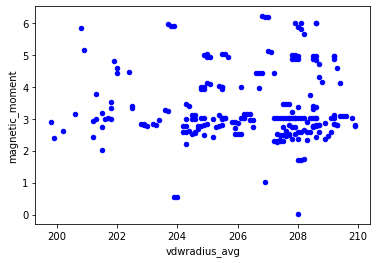

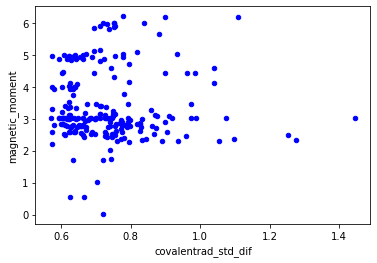

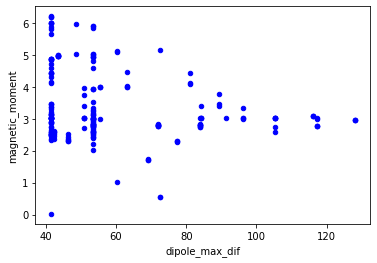

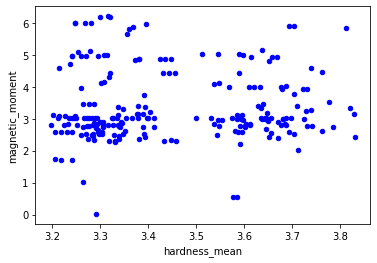

In [131]:
features = ["Nup_mean", "cs_bob",  "nvalence_max_dif", "dipole_avg", "Nup_var", "nvalence_std", 
            "nvalence_avg", "dipole_std_dif",  "vdwradius_avg", "covalentrad_std_dif", "dipole_max_dif", "hardness_mean" ]

feature2 = "magnetic_moment"

# for i in features:
#     tmp = corrdf.loc[corrdf['feature'] == i]
#     print(tmp.correlation)

for i in features:
    ax1 = cdf.plot.scatter(x=i, y=feature2, c='Blue')
